In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import csv

from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
from collections import defaultdict, Counter
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:

dir_path = "./dataset"
names= []
for file in os.listdir(dir_path):
    names +=[file]
# print(names)
image_extensions = []
for path, subdirs,files in os.walk(dir_path):
    for name in files:
        if os.path.splitext(name)[1] not in image_extensions:
            image_extensions += [os.path.splitext(name)[1]]

print(image_extensions)
sorted(os.listdir(dir_path))
# map them to directory for python to use
d= defaultdict(int)
co=0
for i in sorted(os.listdir(dir_path)):
    if i != '.path':
        if not d[i]:
            d[i]=co
            co+=1
d  

['.jpeg']


defaultdict(int, {'folder': 0, 'folder2': 1})

In [3]:
# resize images
def images_resize(dir):
    list_target_names = []
    list_images = []
    for path, subdirs, files in os.walk(dir):
     
        for name in files:
            image=cv2.imread(os.path.join(path, name))
            image=cv2.resize(image, (100, 100))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            list_target_names.append(os.path.basename(path))
            list_images.append(image)
    return { "target_names": list_target_names, "images": list_images }



target_names = images_resize(dir_path)['target_names']
images = images_resize(dir_path)['images']

In [4]:
from collections import Counter
c = Counter(sorted(target_names)) 
c

Counter({'folder': 21, 'folder2': 21})

In [5]:
target_names =[d[key] for key in target_names]

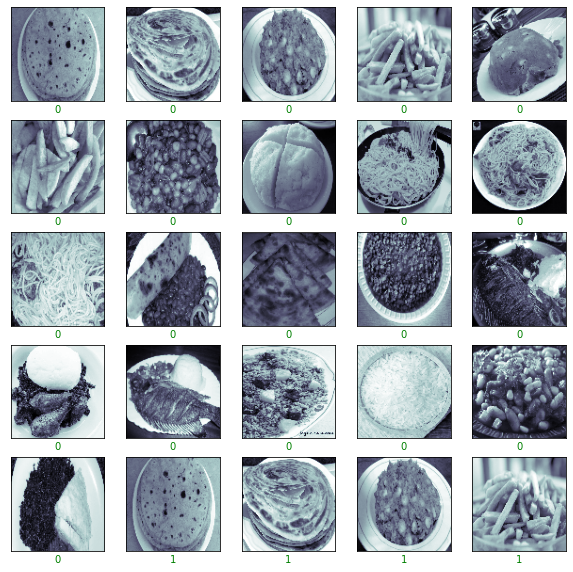

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=target_names[i])
    axi.xaxis.label.set_color('green')
    

In [7]:
from sklearn.utils import shuffle
target_names_shuffled,images_shuffled =shuffle(np.array(target_names)),(np.array(images))

In [8]:
images_shuffled.shape

(42, 100, 100)

In [9]:
images_shuffled.shape
images_shuffled = images_shuffled.reshape( 42,10000)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(images_shuffled, target_names_shuffled) 
print(Xtrain)

ValueError: cannot reshape array of size 420000 into shape (1584,10000)

In [ ]:
mlp = MLPClassifier(verbose=True, max_iter=600000)
mlp.fit(Xtrain,ytrain)

Iteration 1, loss = 4.60420059
Iteration 2, loss = 0.00005206
Iteration 3, loss = 0.00005240
Iteration 4, loss = 0.00005213
Iteration 5, loss = 0.00005145
Iteration 6, loss = 0.00005054
Iteration 7, loss = 0.00004951
Iteration 8, loss = 0.00004844
Iteration 9, loss = 0.00004739
Iteration 10, loss = 0.00004637
Iteration 11, loss = 0.00004543
Iteration 12, loss = 0.00004455
Iteration 13, loss = 0.00004376
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(max_iter=600000, verbose=True)

In [ ]:
mlp.predict_proba(Xtest)